In [34]:
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Image Featureing technique
image read using open cv and then it <br>
convert into numpy array

image:  (374, 500, 3)


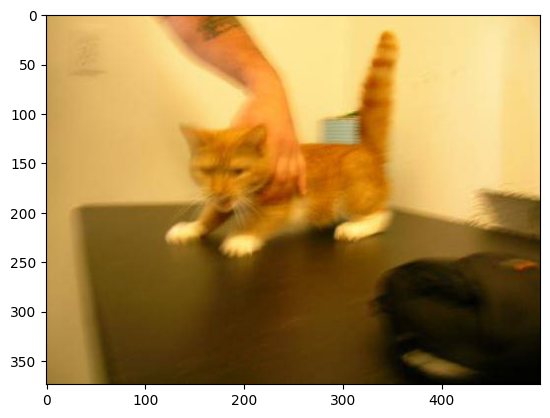

In [19]:
img = np.array(mpimg.imread('/content/drive/MyDrive/data-set/ttrain/cats/cat.0.jpg'))
img.setflags(write=1)
print('image: ',img.shape)
plt.imshow(img)
plt.show()

# Resizing of Image
reduce pixels to make the training part faster

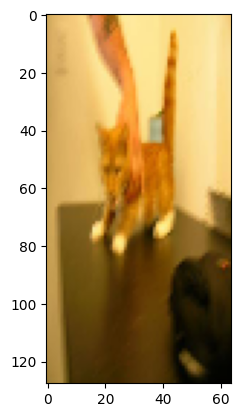

In [20]:
import cv2 as cv
resized_image = cv.resize(img,(64,128))
plt.imshow(resized_image)
plt.show()



# Hog features
we got 6804 features for a single picture . these features will help to detect a picture


In [ ]:
#fd,hog_image = hog(resized_image,visualize=True,multichannel=True)
fd,hog_image = hog(resized_image,visualize=True,channel_axis=-1)
#-- here 'multichannel' is missing so we can use channel_axis=-1 it also work same
print(fd.shape)
print(fd)

print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image,cmap='gray')
plt.show()

# Dogs train data

In [29]:
# dog train data
data_dogs=[]

for entry in glob.glob('/content/drive/MyDrive/data-set/ttrain/dogs/*.jpg'):
    img = np.array(mpimg.imread(entry))
    resizeed_image = cv.resize(img,(64,32))
    fd = hog(resizeed_image,channel_axis=-1)
    data_dogs.append(fd)


# cats train data
data_cats=[]

for entry in glob.glob("/content/drive/MyDrive/data-set/ttrain/cats/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resizeed_image = cv.resize(img,(64,32))
    fd = hog(resizeed_image,channel_axis=-1)
    data_cats.append(fd)


# combaine train data

train_data = data_dogs + data_cats

print(len(train_data))

413


# Test Dataset

# Train data lable


In [27]:
train_label_list = []

for i in range(len(train_data)):
  if i < 100:
    train_label_list.append('cat')
  else:
    train_label_list.append('dog')

print(train_label_list)
print(len(train_label_list))

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog'

# Test Dataset

In [48]:
# dog train data
test_dogs=[]

for entry in glob.glob('/content/drive/MyDrive/data-set/ttrain/dogs/*.jpg'):
    img = np.array(mpimg.imread(entry))
    resizeed_image = cv.resize(img,(64,32))
    fd = hog(resizeed_image,visualize=True, multichannel=True)
    test_dict = {'data':fd,'lable':'dog'}
    test_dogs.append(test_dict)

test_cats=[]

for entry in glob.glob('/content/drive/MyDrive/data-set/ttrain/cats/*.jpg'):
    img = np.array(mpimg.imread(entry))
    resizeed_image = cv.resize(img,(64,32))
    fd = hog(resizeed_image,visualize=True, multichannel=True)
    test_dict = {'data':fd,'lable':'cat'}
    test_cats.append(test_dict)


# combine test data
test_data = test_cats + test_dogs
print(len(test_data))

<ipython-input-48-e0d163fff235>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = hog(resizeed_image,visualize=True, multichannel=True)
<ipython-input-48-e0d163fff235>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = hog(resizeed_image,visualize=True, multichannel=True)


413


# split data and labels to different list

In [49]:
test_features=[]
test_label = []

for i in test_data:
    test_label.append(i['lable'])
    test_features.append(i['data'])
print(len(test_features))
print(test_label)

413
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', '

In [50]:
# K

# KNN
- Eucliden Traning and Predcting using on Value of Hyperparameter K

In [ ]:
print(type(test_features))



In [67]:
x_axis_k_points = []

#list of metrics
f1_eucliden = []
accuracies_eucliden =[]
conf_matrix_eucliden = []

for k in range(7):
  #knn classifer Train Data
  knn_eucliden = KNeighborsClassifier(n_neighbors=k+1)
  knn_eucliden.fit(train_data,train_label_list)

  #knn prediction
  pred_lables_eucliden =  knn_eucliden.predict(test_features)

  # accuracy of prediction
  acc_eucliden = knn_eucliden.score(test_features,test_label)
  accuracies_eucliden.append(acc_eucliden)

  # confusion matrix of predictions
  conf_matrix_eucliden.append(metrics.f1_score(test_label,pred_lables_eucliden,pos_label='dog'))

  x_axis_k_points.append(k+1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


AttributeError: ignored